In [1]:
import soundfile as sf

In [2]:
import torch

In [11]:
import matplotlib.pyplot as plt

In [15]:
import torchaudio

In [4]:
def load_audio(path):
    """Load audio file as torch tensor with shape (channels, samples)."""
    data, sample_rate = sf.read(path)
    waveform = torch.from_numpy(data).float()
    if waveform.dim() == 1:
        waveform = waveform.unsqueeze(0)  # mono: add channel dimension
    else:
        waveform = waveform.T  # stereo: transpose to (channels, samples)
    return waveform, sample_rate

In [5]:
waveform, sample_rate = load_audio("impulse2.wav")

In [24]:
print(f"Waveform shape: {waveform.shape}")
print(f"Sample rate: {sample_rate}")
print(f"Duration: {waveform.shape[1] / sample_rate:.2f} seconds")
print(f"Channels: {waveform.shape[0]}")

Waveform shape: torch.Size([1, 46605])
Sample rate: 44100
Duration: 1.06 seconds
Channels: 1


In [23]:
print(f"Data type: {waveform.dtype}")
print(f"Min value: {waveform.min():.4f}")
print(f"Max value: {waveform.max():.4f}")
print(f"Mean: {waveform.mean():.4f}")

Data type: torch.float32
Min value: -0.4672
Max value: 0.3806
Mean: -0.0000


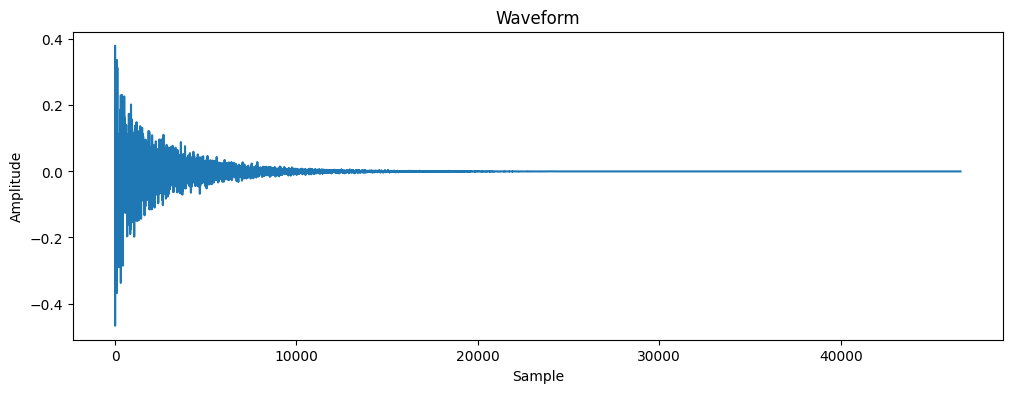

In [13]:
# Plot the waveform
audio = waveform[0]
plt.figure(figsize=(12, 4))
plt.plot(audio)
plt.title("Waveform")
plt.xlabel("Sample")
plt.ylabel("Amplitude")
plt.show()

In [16]:
# Create a spectrogram transform
spectrogram_transform = torchaudio.transforms.Spectrogram(
    n_fft=1024,
    hop_length=512
)

# Apply it to the waveform
spectrogram = spectrogram_transform(waveform)

print(f"Spectrogram shape: {spectrogram.shape}")

Spectrogram shape: torch.Size([1, 513, 92])


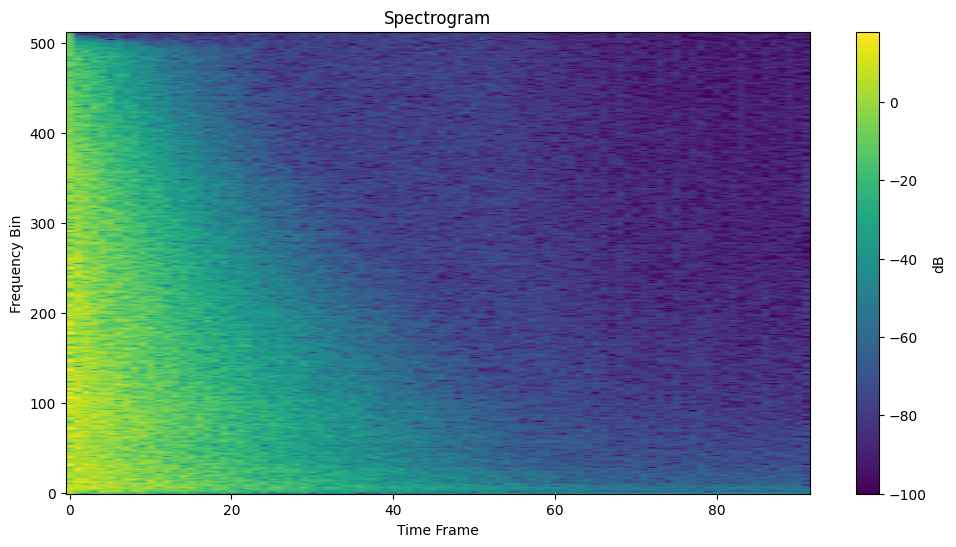

In [20]:
# Display spectrogram

# Convert to decibels for better visualization
spectrogram_db = torchaudio.transforms.AmplitudeToDB()(spectrogram)

plt.figure(figsize=(12, 6))
plt.imshow(
    spectrogram_db[0],  # First channel
    aspect='auto',
    origin='lower',
    cmap='viridis'
)
plt.colorbar(label='dB')
plt.title("Spectrogram")
plt.xlabel("Time Frame")
plt.ylabel("Frequency Bin")
plt.show()

In [42]:
steps = waveform.shape[1]
t = torch.linspace(0, 1, 46605)
lfo_sine = (torch.sin(100*t) + 1) / 2



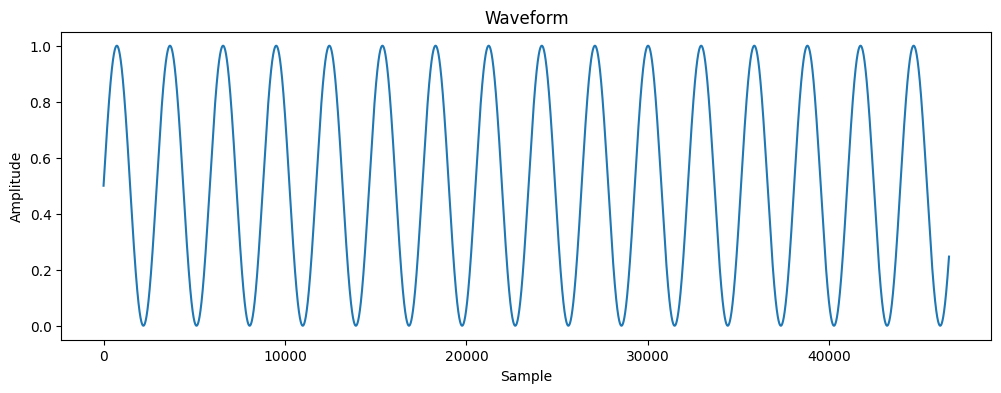

In [43]:
# Plot the waveform
audio = lfo_sine
plt.figure(figsize=(12, 4))
plt.plot(audio)
plt.title("Waveform")
plt.xlabel("Sample")
plt.ylabel("Amplitude")
plt.show()

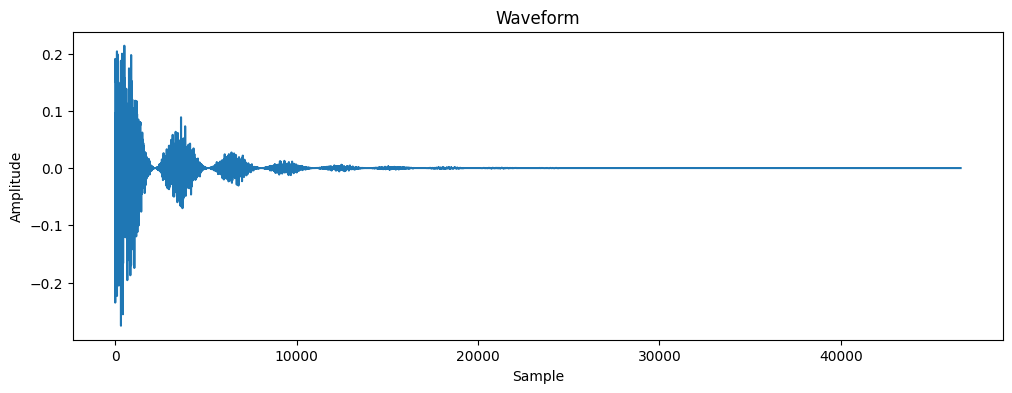

In [44]:
# Plot the waveform
audio = lfo_sine * waveform[0]
plt.figure(figsize=(12, 4))
plt.plot(audio)
plt.title("Waveform")
plt.xlabel("Sample")
plt.ylabel("Amplitude")
plt.show()